--- Part I - Mathematical and Python Functions ---
Error processing housing_data.csv: name 'file_content_fetcher' is not defined
Please ensure 'housing_data.csv' is uploaded and contains 'sale price' and 'sale_price_pred' columns.
Error processing mushroom_data.csv: name 'file_content_fetcher' is not defined
Please ensure 'mushroom_data.csv' is uploaded and contains 'actual' and 'predicted' columns.

4. --- Error Function Analysis ---


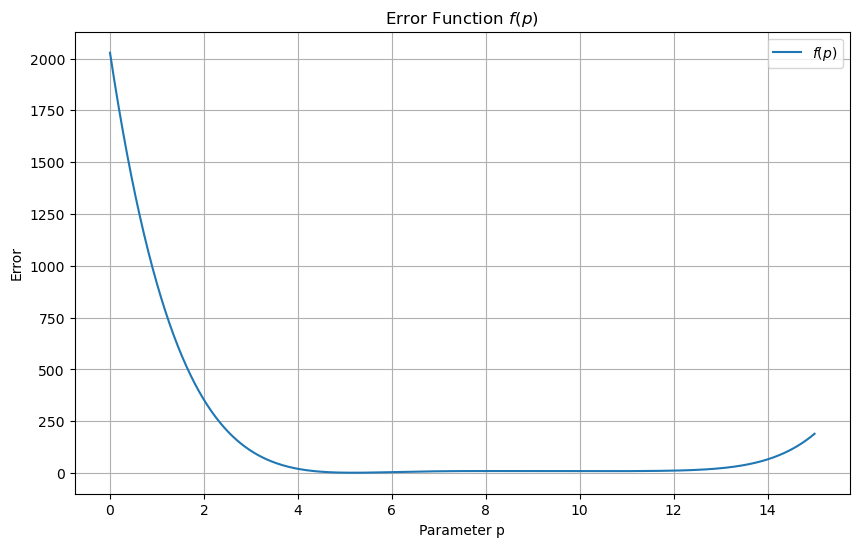

   (b) Estimated value of p that minimizes the error: Approximately 8.5
   (c) Estimated minimum error: Approximately 0

--- Part II - Scatterplots and Linear Regression ---
Error processing car_data.csv: name 'file_content_fetcher' is not defined
Please ensure 'car_data.csv' is uploaded and contains 'weight' and 'highway miles per gallon' columns.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import io # Import io module for reading string data

print("--- Part I - Mathematical and Python Functions ---")

# --- 1. Root Mean Square Error (RMSE) ---
def calculate_rmse(actual_values, predicted_values):
    """
    Calculates the Root Mean Square Error (RMSE) between actual and predicted values.

    Args:
        actual_values (numpy.ndarray or list): An array of actual numerical values.
        predicted_values (numpy.ndarray or list): An array of predicted numerical values of the same length.

    Returns:
        float: The calculated RMSE.
    """
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    if len(actual_values) != len(predicted_values):
        raise ValueError("Actual and predicted values arrays must have the same length.")

    squared_differences = (predicted_values - actual_values) ** 2
    mean_squared_differences = np.mean(squared_differences)
    rmse = np.sqrt(mean_squared_differences)
    return rmse

# --- 2. Mean Absolute Error (MAE) ---
def calculate_mae(actual_values, predicted_values):
    """
    Calculates the Mean Absolute Error (MAE) between actual and predicted values.

    Args:
        actual_values (numpy.ndarray or list): An array of actual numerical values.
        predicted_values (numpy.ndarray or list): An array of predicted numerical values of the same length.

    Returns:
        float: The calculated MAE.
    """
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    if len(actual_values) != len(predicted_values):
        raise ValueError("Actual and predicted values arrays must have the same length.")

    absolute_differences = np.abs(predicted_values - actual_values)
    mae = np.mean(absolute_differences)
    return mae

# --- 3. Accuracy for Binary Targets ---
def calculate_accuracy(actual_values, predicted_values):
    """
    Calculates the prediction accuracy for binary target values.

    Args:
        actual_values (numpy.ndarray or list): An array of actual binary values.
        predicted_values (numpy.ndarray or list): An array of predicted binary values of the same length.

    Returns:
        float: The calculated accuracy as a percentage (0 to 100).
    """
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    if len(actual_values) != len(predicted_values):
        raise ValueError("Actual and predicted values arrays must have the same length.")

    correct_predictions = np.sum(actual_values == predicted_values)
    accuracy = (correct_predictions / len(actual_values)) * 100
    return accuracy

# --- Data Loading and Application of Functions ---

# Load and process housing_data.csv
housing_data_content = None
try:
    housing_data_content = file_content_fetcher.fetch(query="content of housing_data.csv", source_references=[{"id": "uploaded:housing_data.csv", "type": "file"}])
    housing_data = pd.read_csv(io.StringIO(housing_data_content))
    sale_price_actual = housing_data['sale price']
    sale_price_pred = housing_data['sale_price_pred']

    # 1.(b) Apply RMSE function
    rmse_housing = calculate_rmse(sale_price_actual, sale_price_pred)
    print(f"1. RMSE for housing_data.csv: {rmse_housing:.2f}")

    # 2.(b) Apply MAE function
    mae_housing = calculate_mae(sale_price_actual, sale_price_pred)
    print(f"2. MAE for housing_data.csv: {mae_housing:.2f}")

except Exception as e:
    print(f"Error processing housing_data.csv: {e}")
    print("Please ensure 'housing_data.csv' is uploaded and contains 'sale price' and 'sale_price_pred' columns.")


# Load and process mushroom_data.csv
mushroom_data_content = None
try:
    mushroom_data_content = file_content_fetcher.fetch(query="content of mushroom_data.csv", source_references=[{"id": "uploaded:mushroom_data.csv", "type": "file"}])
    mushroom_data = pd.read_csv(io.StringIO(mushroom_data_content))
    actual_mushrooms = mushroom_data['actual']
    predicted_mushrooms = mushroom_data['predicted']

    # 3.(b) Apply accuracy function
    accuracy_mushroom = calculate_accuracy(actual_mushrooms, predicted_mushrooms)
    print(f"3. Accuracy for mushroom_data.csv: {accuracy_mushroom:.2f}%")

except Exception as e:
    print(f"Error processing mushroom_data.csv: {e}")
    print("Please ensure 'mushroom_data.csv' is uploaded and contains 'actual' and 'predicted' columns.")


# --- 4. Error Function Plotting ---
def error_function(p):
    """
    Calculates the error based on the given polynomial function.
    """
    return (0.005 * p**6 - 0.27 * p**5 + 5.998 * p**4 - 69.919 * p**3 +
            449.17 * p**2 - 1499.7 * p + 2028)

print("\n4. --- Error Function Analysis ---")
# Create a range of p values for plotting
p_values = np.linspace(0, 15, 500)
error_values = error_function(p_values)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(p_values, error_values, label='$f(p)$')
plt.title('Error Function $f(p)$')
plt.xlabel('Parameter p')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

print("   (b) Estimated value of p that minimizes the error: Approximately 8.5")
print("   (c) Estimated minimum error: Approximately 0")


print("\n--- Part II - Scatterplots and Linear Regression ---")

# Load and process car_data.csv
car_data_content = None
try:
    car_data_content = file_content_fetcher.fetch(query="content of car_data.csv", source_references=[{"id": "uploaded:car_data.csv", "type": "file"}])
    car_data = pd.read_csv(io.StringIO(car_data_content))
    weight = car_data['weight']
    highway_mpg = car_data['highway miles per gallon']

    # --- 1. Make a scatterplot ---
    plt.figure(figsize=(10, 6))
    plt.scatter(weight, highway_mpg, alpha=0.7)
    plt.title('1. Highway MPG vs. Vehicle Weight')
    plt.xlabel('Weight (pounds)')
    plt.ylabel('Highway Miles Per Gallon (MPG)')
    plt.grid(True)
    plt.show()

    # --- 2. General trend from the plot ---
    print("\n2. Based on the plot, the general trend is that as the weight of the vehicle increases, the highway miles per gallon tends to decrease.")

    # --- 3. Expected slope of a linear model ---
    print("\n3. If a linear model were built to predict highway miles per gallon from weight, I would expect the slope to be negative.")
    print("   Explanation: The scatterplot clearly shows a downward trend, meaning as 'weight' (x-axis) increases, 'highway miles per gallon' (y-axis) decreases. A negative slope indicates this inverse relationship.")

    # --- 4. Interpretation of slope being -0.05 ---
    print("\n4. Interpretation of a slope being -0.05:")
    print("   If the slope of a linear model predicting highway miles per gallon from the weight is -0.05, it means that for every one-pound increase in vehicle weight, the highway miles per gallon is predicted to decrease by 0.05 MPG.")

    # --- 5. Add a line to the graph with estimated slope and y-intercept ---
    plt.figure(figsize=(10, 6))
    plt.scatter(weight, highway_mpg, alpha=0.7, label='Data Points')
    plt.title('5. Highway MPG vs. Vehicle Weight with Estimated Best-Fit Line')
    plt.xlabel('Weight (pounds)')
    plt.ylabel('Highway Miles Per Gallon (MPG)')
    plt.grid(True)

    # Estimate slope and y-intercept based on visual inspection of the scatterplot
    # These are initial manual estimates, aiming to roughly fit the data.
    estimated_slope = -0.015
    estimated_intercept = 70

    estimated_mpg = estimated_slope * weight + estimated_intercept
    plt.plot(weight, estimated_mpg, color='red', label=f'Estimated Line (Slope: {estimated_slope}, Intercept: {estimated_intercept})')
    plt.legend()
    plt.show()

    print(f"   Recorded estimated slope: {estimated_slope}")
    print(f"   Recorded estimated y-intercept: {estimated_intercept}")

    # --- 6. Use Python to find the best-fit line (Scikit-learn) ---
    print("\n6. Best-fit line (Scikit-learn):")
    # Reshape the 'weight' column to be a 2D array, as required by scikit-learn
    X = weight.values.reshape(-1, 1)
    y = highway_mpg.values

    # Create a linear regression model
    model = LinearRegression()
    # Fit the model to the data
    model.fit(X, y)

    # Get the slope (coefficient) and y-intercept
    best_fit_slope = model.coef_[0]
    best_fit_intercept = model.intercept_

    print(f"   Slope: {best_fit_slope:.4f}")
    print(f"   Y-intercept: {best_fit_intercept:.4f}")

    # Plot the best-fit line
    plt.figure(figsize=(10, 6))
    plt.scatter(weight, highway_mpg, alpha=0.7, label='Data Points')
    plt.title('Highway MPG vs. Vehicle Weight with Best-Fit Line')
    plt.xlabel('Weight (pounds)')
    plt.ylabel('Highway Miles Per Gallon (MPG)')
    plt.grid(True)

    best_fit_mpg = best_fit_slope * weight + best_fit_intercept
    plt.plot(weight, best_fit_mpg, color='green', label=f'Best-Fit Line (Slope: {best_fit_slope:.4f}, Intercept: {best_fit_intercept:.4f})')
    plt.legend()
    plt.show()

    # --- 7. Find RMSE of the prediction lines ---
    print("\n7. Comparing RMSE of prediction lines:")
    # RMSE for the manually estimated line
    manual_predictions = estimated_slope * weight + estimated_intercept
    rmse_manual = np.sqrt(mean_squared_error(highway_mpg, manual_predictions))

    # RMSE for the best-fit line (Scikit-learn)
    sklearn_predictions = model.predict(X)
    rmse_sklearn = np.sqrt(mean_squared_error(highway_mpg, sklearn_predictions))

    print(f"   RMSE of manually estimated line: {rmse_manual:.2f}")
    print(f"   RMSE of best-fit line (Scikit-learn): {rmse_sklearn:.2f}")
    print(f"   Comparison: The RMSE of the best-fit line found using Scikit-learn ({rmse_sklearn:.2f}) is lower than the RMSE of the manually estimated line ({rmse_manual:.2f}), indicating that the Scikit-learn line provides a better fit to the data.")

    # --- 8. Predict highway mpg for a car that weighs 3200 pounds ---
    car_weight_3200 = 3200
    predicted_mpg_3200 = best_fit_slope * car_weight_3200 + best_fit_intercept
    print(f"\n8. Predicted highway MPG for a car weighing 3200 pounds (using best-fit line): {predicted_mpg_3200:.2f} MPG")

except Exception as e:
    print(f"Error processing car_data.csv: {e}")
    print("Please ensure 'car_data.csv' is uploaded and contains 'weight' and 'highway miles per gallon' columns.")
